# Soluzione equazioni differenziali


In [17]:
import numpy as np
import matplotlib.pyplot as plt


def a(x,v,t):
    g=9.81
    w=0.31622776601683794
    return -w**2*x

def initial_condition(x,v,x0,v0):
    x[0]=x0
    v[0]=v0

h=0.0001

tmax=100
N=int(tmax/h)
x=np.zeros(N)
v=np.zeros(N)
t=np.arange(0,tmax,h)




In [18]:
initial_condition(x,v,5,0.1)

A=x[0]
k=1
m=10
w0=np.sqrt(k/m)
E_true=0.5*k*A**2
En=np.zeros((3,N))

def E(x,v,t):
    return 0.5*m*v**2+0.5*k*x**2

Eulero cromer 
$$
\begin{cases}
x_{n+1}=x_n+hv_{n+1} \\
v_{n+1}=v_n+ha_n 
\end{cases}
$$

In [19]:
for i in range(0,N-1):
    
    v[i+1]=v[i]+h*a(x[i],v[i],t[i])
    x[i+1]=x[i]+h*v[i+1] 

En[0]=E(x,v,t)

Verlet velocity 
$$ \begin{cases}
x_{n+1}=x_n+v_n h+\frac{h^2}{2}a_n \\
v_{n+1}=v_n+\frac{h}{2}(a_n+a_{n+1})
\end{cases} $$

In [20]:
for i in range(0,N-1):
    x[i+1]=x[i]+h*v[i]+0.5*h**2*a(x[i],v[i],t[i])
    v[i+1]=v[i]+0.5*h*(a(x[i],v[i],t[i])+a(x[i+1],v[i+1],t[i+1]))

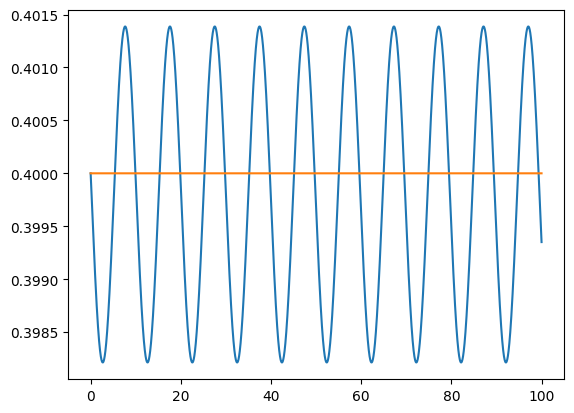

In [21]:
En[1]=E(x,v,t)
err=np.zeros((3,N))
err[0]=(100*np.abs(En[0]-E_true))/E_true
err[1]=(100*np.abs(En[1]-E_true))/E_true

plt.plot(t,err[0])
plt.plot(t,err[1])



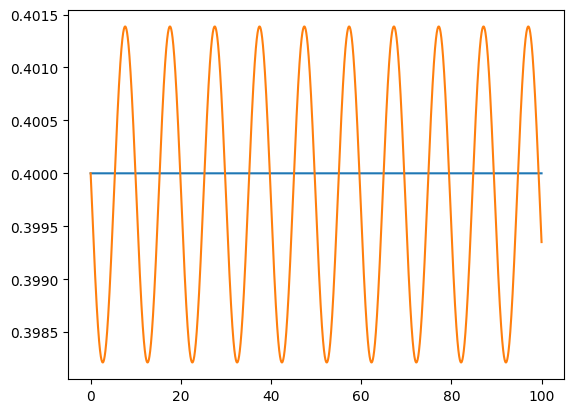

In [22]:
x[1:]=0
v[1:]=0
for i in range(0,N-1):
        k1=h*v[i]
        w1=h*a(x[i],v[i],t[i])
        k2=h*(v[i]+w1*0.5)
        w2=h*a(x[i]+0.5*k1,v[i]+0.5*w1,t[i]+0.5*h)
        x[i+1]=x[i]+k2
        v[i+1]=v[i]+w2

En[2]=E(x,v,t)
err[2]=(100*np.abs(En[2]-E_true))/E_true
plt.plot(t,err[2])
plt.plot(t,err[0])




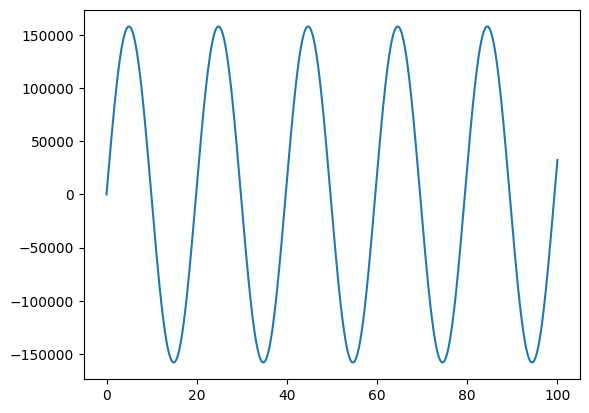

In [23]:

x[1]=2*x[0]+h**2*a(x[0],v[0],t[0])
t[1]=h
for i in range(1,N-1):
    
    x[i+1]=2*x[i]-x[i-1]+h**2*a(x[i],v[i],t[i])

plt.plot(t,x)

